# Assignment1
submitted by - Archit Kumar 2018201051

## Question 1 : Building Decision Tree 

In [9]:
import sys
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [10]:
class node(object):
    def __init__(self, attribute , threshold, parent):
        self.attr = attribute
        self.thres = threshold
        self.left = None
        self.right = None
        self.leaf = False
        self.predict = None
        self.parent = parent
        self.level = 0

In [22]:
class DecisionTree():
    def __init__(self ,train_data , predict_attr , attributes =  None ,node_count = 0,  depth = 7, method = 'entropy' ):
        # node_count is given preference over depth
        
        if attributes == None :
            attr = list(train_data.columns)
        else :
            attr = attributes
          
        if predict_attr in attr:
            attr.remove(predict_attr)
            
        if node_count != 0 :
            depth = math.ceil(math.log(node_count + 1 , 2))
            
        root = self.build_tree(train_data, attr, predict_attr , depth = depth, method = method)
        self.root = root
        self.depth = depth
    
    def num_elements(self , df,predict_attr):
        return df[df[predict_attr] == 1].shape[0] , df[df[predict_attr] == 0].shape[0]
        
    
    def ulist(self,df,  attr) :
        lis = df[attr].tolist()
        lis.sort()
        lis = set(lis)
        lis = list(lis)
        lis = [float(x) for x in lis]
        return lis
        
    
    def info_entropy(self , df, predict_attr): 
        p ,n =  self.num_elements(df, predict_attr)
        p = float(p)
        n=  float(n)
        if p == 0 or n == 0 :
            return 0  
        pos_prob = (p)/(p+n)
        neg_prob = (n)/(p+n)
        return (-1*pos_prob)*math.log(pos_prob, 2) + (-1*neg_prob)*math.log(neg_prob, 2)
        
    
    def info_gain(self, df, attribute, predict_attr, threshold):
        sub1 = df[df[attribute] <= threshold]
        sub2 = df[df[attribute] > threshold]
        num_data = float(df.shape[0])
        return self.info_entropy(df, predict_attr) -  float(float(sub1.shape[0])/num_data)*self.info_entropy(sub1, predict_attr) - float(float(sub2.shape[0])/num_data)*self.info_entropy(sub2, predict_attr) 


    def choose_attr(self, df,attributes,predict_attr):
        max_info_gain = float("-inf")
        best_attr = None
        threshold = 0
        for i in range(0, len(attributes)):
            attr = attributes[i]
            thres ,  ig = self.select_threshold(df,attr,predict_attr)
            if ig <= max_info_gain:continue
            elif ig > max_info_gain:
                max_info_gain = ig
                best_attr = attr
                threshold  = thres
        return best_attr , threshold
    
    def select_threshold(self, df, attribute , predict_attr):
        values = self.ulist(df,attribute)    
        max_ig = float("-inf")
        thres_val = 0 
        for i in range(0, len(values)-1):
            ig = self.info_gain(df, attribute, predict_attr,  (values[i] + values[i+1])/2)
            if ig <= max_ig:continue
            else:
                max_ig = ig
                thres_val = (values[i] + values[i+1])/2
        return thres_val , max_ig
        
    def choose_attr_misclassification(self ,df,attributes,predict_attr):
        min_gv = float("inf")
        best_attr = None
        threshold = 0
        for i  in range(0, len(attributes)):
            attr = attributes[i]
            thres, gv = self.select_threshold_misclassification(df,attr,predict_attr)
            if gv >= min_gv: continue
            elif gv < min_gv:
                min_gv = gv
                best_attr = attr
                threshold  = thres
        if gv != 0 : return best_attr , threshold
        return best_attr , -1
    
    def select_threshold_misclassification(self,df, attribute , predict_attr):
        values = self.ulist(df, attribute)
        min_gv = float("inf")
        thres_val = 0 
        for i in range(0, len(values)-1):
            gv = self.misclassification_val_avg(df, attribute, predict_attr,  (values[i] + values[i+1])/2)
            if gv >= min_gv : continue
            else :
                min_gv = gv
                thres_val = (values[i] + values[i+1])/2
        return thres_val , min_gv
    
    def misclassification_val_avg(self ,df, attribute, predict_attr, threshold):
        sub1 = df[df[attribute] <= threshold]
        sub2 = df[df[attribute] > threshold]

        total= float(df.shape[0])
    
        p_d1 = sub1[sub1[predict_attr] == 1]
        n_d1 = sub1[sub1[predict_attr] == 0]
        p1 = float(p_d1.shape[0])/sub1.shape[0]
        n1 =  float(n_d1.shape[0])/sub1.shape[0]
        me1 = min(p1,n1)
    
     
        p_d2 = sub2[sub2[predict_attr] == 1]
        n_d2 = sub2[sub2[predict_attr] == 0]
        p2 = float(p_d2.shape[0])/sub2.shape[0]
        n2 =  float(n_d2.shape[0])/sub2.shape[0]
        me2 = min(p2,n2)
    
        return (sub1.shape[0]/total)*me1 + (sub2.shape[0]/total)*me2
    
    def choose_attr_gini(self, df,attributes,predict_attr):
        min_gv = float("inf")
        best_attr = None
        threshold = 0
        for i in range(0, len(attributes)):
            attr = attributes[i]
            thres, gv = self.select_threshold_gini(df,attr,predict_attr)
            if gv < min_gv:
                min_gv = gv
                best_attr = attr
                threshold  = thres
#     print("info gain " + str(ig))
        if gv == 0 : return best_attr , -1
        return best_attr , threshold
    
    def select_threshold_gini(self ,df, attribute , predict_attr):
        values = self.ulist(df,attribute)
        min_gv = float("inf")
        thres_val = 0 
        for i in range(0, len(values)-1):
            gv = self.gini_val_avg(df, attribute, predict_attr, (values[i] + values[i+1])/2)
            if gv >= min_gv : continue
            else : 
                min_gv = gv
                thres_val = (values[i] + values[i+1])/2
        return thres_val , min_gv
    
    def gini_val_avg(self ,df, attribute, predict_attr, threshold):
        sub1 = df[df[attribute] <= threshold]
        sub2 = df[df[attribute] > threshold]

        total= float(df.shape[0])
    
        p_d1 = sub1[sub1[predict_attr] == 1]
        n_d1 = sub1[sub1[predict_attr] == 0]
        p1 = float(p_d1.shape[0])/sub1.shape[0]
        n1 =  float(n_d1.shape[0])/sub1.shape[0]
        gv1 = 1 - p1*p1 - n1*n1
    
     
        p_d2 = sub2[sub2[predict_attr] == 1]
        n_d2 = sub2[sub2[predict_attr] == 0]
        p2 = float(p_d2.shape[0])/sub2.shape[0]
        n2 =  float(n_d2.shape[0])/sub2.shape[0]
        gv2 = 1 - p2*p2 - n2*n2
    
        return (sub1.shape[0]/total)*gv1 + (sub2.shape[0]/total)*gv2
    
    def build_leaf(self, parent , level , predict):
        new_leaf = node(None, None,parent)
        new_leaf.leaf = True
        new_leaf.predict = predict
        new_leaf.level = level + 1
        return new_leaf
    
    def build_tree(self ,df,cols,predict_attr, parent = None , level = 0, depth = 20, method = 'entropy'):   
    
        p,n = self.num_elements(df, predict_attr)
    
        if  p  == 0 or n == 0 or level == depth :
            if p > n :
                return self.build_leaf(parent , level , 1)
            else :
                return self.build_leaf(parent, level, 0 )

        else:

            if method == 'entropy':
                best_attr , threshold = self.choose_attr(df,cols,predict_attr)
            elif method == 'gini' :
                best_attr , threshold = self.choose_attr_gini(df,cols,predict_attr)
            else :
                best_attr , threshold = self.choose_attr_misclassification(df,cols,predict_attr)
            
        
            if threshold == -1 or threshold == 0:
                if p > n :
                    return self.build_leaf(parent , level , 1)
                else :
                    return self.build_leaf(parent, level, 0 )

#             print(best_attr + " " + str(threshold))

            tree = node(best_attr , threshold , parent)
            tree.level = level + 1
        
            sub1 = df[df[best_attr] <= threshold]
            tree.left = self.build_tree(sub1 , cols , predict_attr , tree , tree.level , depth, method)

        
            sub2 = df[df[best_attr] > threshold]        
            tree.right = self.build_tree(sub2 , cols , predict_attr, tree, tree.level, depth, method)
            return tree
        
    def validate_tree(self,root,df):
        total = df.shape[0]
        correct = float(0)
        for index,row in df.iterrows():
            prediction = predict(root, row)
            if prediction == row['left']:
                correct += 1
        return correct/total
    
    def prune_tree(self, root , cnode ,dataset , best_score):
        if cnode.leaf == True:
            prediction = cnode.predict
            cnode.parent.leaf = True
            cnode.parent.predict = cnode.predict
            new_score = self.validate_tree(root, dataset)
            if new_score >= best_score :
                return new_score
            else:
                cnode.parent.leaf = False
                cnode.parent.predict = None
                return best_score
        else:
            new_score  = self.prune_tree(root,  cnode.left , dataset , best_score)
            if (cnode.leaf  == True):
                return new_score
            new_score = self.prune_tree(root, cnode.right, dataset,new_score)
            if cnode.leaf == True:
                return new_score
            return new_score
        
        
    def predict(self, node, row_df):
        if node.leaf:
            return node.predict
        if row_df[node.attr] <= node.thres:
            return self.predict(node.left, row_df)
        elif row_df[node.attr] > node.thres:
            return self.predict(node.right, row_df)

   
        

In [4]:
def encoder(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            labels = df[col].astype('category').cat.categories.tolist()
            replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
            df.replace(replace_map_comp, inplace=True)
            df[col].astype('float')
    return df

In [5]:
def import_data(filename) :
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = list(balance_data)
    balance_data = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)


    train_data = balance_data.iloc[:10000,:]
#     test_data = balance_data.iloc[9001:11000,:]
    validation_data = balance_data.iloc[10001:,:]
    train_data.columns = attrq
#     test_data.columns = attrq
    validation_data.columns = attrq
    return train_data , validation_data 

In [6]:
def import_test_data(filename) :
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = list(balance_data)
    balance_data = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    return balance_data

In [7]:
def test_predictions(model, df):
    num_data = df.shape[0]
    num_correct = float(0)
    tp = float(0) 
    tn = float(0) 
    fp = float(0.0001) 
    fn = float(0.0001)
    for index,row in df.iterrows():
        prediction = model.predict(model.root, row)
        if prediction == 1 :
            if row['left'] == 1 :tp += 1
            else: fp += 1
        else:
            if row['left'] == 0 :tn += 1
            else: fn += 1
        if prediction == row['left']:
            num_correct += 1
    precision = tp/(tp+fp)
    recall = tp/(tp + fn)
    print("true positive "+ str(int(tp)))
    print("true negative "+ str(int(tn)))
    print("false positive " + str(int(fp)))
    print("false negative " + str(int(fn)))
    print("accuracy is " + str(100*num_correct/num_data)+ "%")
    print("precision is " + str(precision))
    print("recall is " + str(recall))
    print("F1 score " + str(2*precision*recall/(precision + recall+0.0001)))
    return num_correct/num_data


# Part-1 

#### training Decision tree on categorical features

In [29]:
train_data ,  val_data = import_data('train.csv')
attrs = [ "Work_accident",   "promotion_last_5years" , "sales" , "salary"]
model = DecisionTree(train_data,'left',attrs , depth = 4 , method = 'entropy')

In [30]:
test_data = import_test_data('train.csv')
test_predictions(model,val_data)

true positive 0
true negative 936
false positive 0
false negative 301
accuracy is 75.6669361358%
precision is 0.0
recall is 0.0
F1 score 0.0


0.7566693613581245

# Part-2 

#### Training Decision Tree on complete set of attributes 

In [31]:
train_data , val_data = import_data('train.csv')
model = DecisionTree(train_data,'left',  depth = 4 , method = 'entropy')

In [32]:
# test_data = import_test_data('train.csv')
test_predictions(model,val_data)

true positive 275
true negative 926
false positive 19
false negative 17
accuracy is 97.0897332255%
precision is 0.935373831505
recall is 0.94178049939
F1 score 0.938516235817


0.9708973322554567

# Part-3 

### using entropy method

In [241]:
train_data ,  val_data = import_data('train.csv')
model = DecisionTree(train_data,'left',  depth = 4 , method = 'entropy')
test_predictions(model,val_data)

true positive 276
true negative 921
false positive 14
false negative 26
accuracy is 96.7663702506%
precision is 0.95172380975
recall is 0.91390698215
F1 score 0.932382140645


0.967663702506063

### using missclassification error 

In [242]:
train_data , val_data = import_data('train.csv')
model = DecisionTree(train_data,'left',  depth = 4 , method = 'miss')
test_predictions(model,val_data)

true positive 204
true negative 927
false positive 11
false negative 95
accuracy is 91.4308811641%
precision is 0.948836767983
recall is 0.682274019306
F1 score 0.793725348559


0.9143088116410671

### using gini index 

In [243]:
train_data ,val_data = import_data('train.csv')
model = DecisionTree(train_data,'left',  depth = 4 , method = 'gini')
test_predictions(model,val_data)

true positive 270
true negative 930
false positive 10
false negative 27
accuracy is 97.0088924818%
precision is 0.964285369898
recall is 0.909090603
F1 score 0.935824938314


0.9700889248181084

#  Part-4

### 1. graph visualization for satisfaction_level and number of  project 

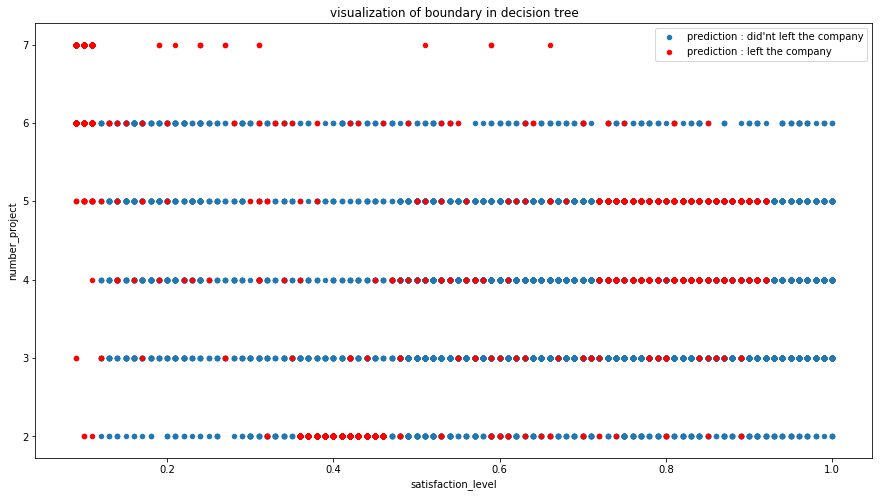

In [196]:
%matplotlib inline
train_data , validation_data  = import_data('train.csv')

balance_data = pd.concat([train_data , validation_data ])
p_data = balance_data[balance_data['left'] == 1]
n_data = balance_data[balance_data['left'] == 0]

ax = plt.gca()

plot = n_data.plot.scatter(y="number_project" , x= "satisfaction_level", ax=ax, figsize=(15,8) , label = 'prediction : did\'nt left the company')
plot1 = p_data.plot.scatter(y="number_project" , x= "satisfaction_level" ,marker ='o', color = 'red' ,ax =ax, figsize=(15,8), label = 'prediction : left the company' , title= 'visualization of boundary in decision tree')

# fig = plot1.get_figure()
# fig.savefig('visualization2.png')
# fig.show()

### graph visualization for average monthly hours and number of project 

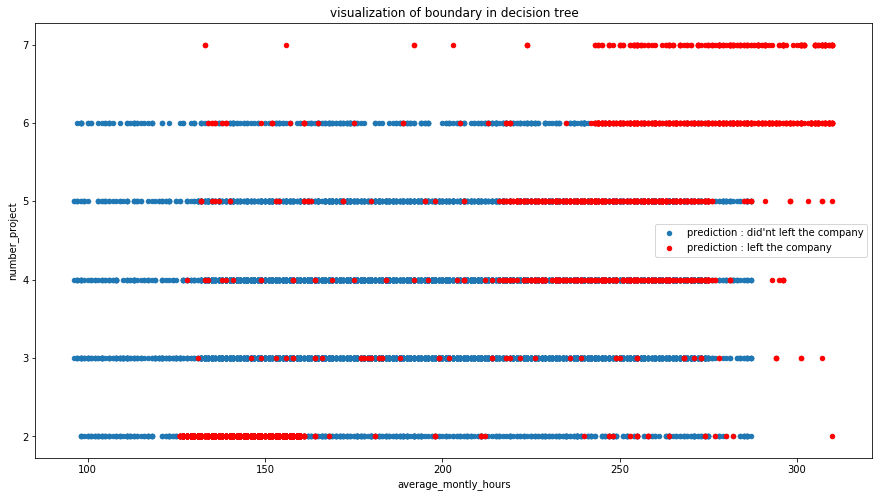

In [197]:
%matplotlib inline
train_data , validation_data  = import_data('train.csv')

balance_data = pd.concat([train_data , validation_data ])

p_data = balance_data[balance_data['left'] == 1]
n_data = balance_data[balance_data['left'] == 0]

ax = plt.gca()

plot = n_data.plot.scatter(y="number_project" , x= "average_montly_hours", ax=ax, figsize=(15,8) , label = 'prediction : did\'nt left the company')
plot1 = p_data.plot.scatter(y="number_project" ,x= "average_montly_hours" ,marker ='o', color = 'red' ,ax =ax, figsize=(15,8), label = 'prediction : left the company' , title= 'visualization of boundary in decision tree')

# part-5 

### depth vs error plot 

In [198]:
def depth_vs_error(filename , length = 7):
    train_data , validate_data = import_data(filename)
    depth_arr = []
    train_err = []
    validate_err = []
    for depth in range(1, length):
        print("=========training on depth : " + str(depth)+"=================")
        model  = DecisionTree(train_data,'left', depth = depth , method = 'entropy')
        print("=========================== on train error ===============================")
        train_error = 1 - test_predictions(model , train_data) 
        print("=========================== on validate error ===============================")
        validate_error = 1  - test_predictions(model, validate_data)
        depth_arr.append(depth)
        train_err.append(train_error)
        validate_err.append(validate_error)
    return depth_arr,train_err,validate_err
        

In [87]:
depth_arr,train_err,validate_err =  depth_vs_error('train.csv' , 20)

=========training on depth : 1=================
=========================== on train error ===============================
true positive 1512
true negative 5880
false positive 991
false negative 617
accuracy is 82.1333333333%
precision is 0.604075085734
recall is 0.710192545317
F1 score 0.652800042492
=========================== on validate error ===============================
true positive 342
true negative 1287
false positive 229
false negative 141
accuracy is 81.4907453727%
precision is 0.598949107014
recall is 0.708074387562
F1 score 0.648906585934
=========training on depth : 2=================
=========================== on train error ===============================
true positive 923
true negative 6754
false positive 117
false negative 1206
accuracy is 85.3%
precision is 0.887499914663
recall is 0.433536851407
F1 score 0.582474015573
=========================== on validate error ===============================
true positive 205
true negative 1484
false positive 32
false negativ

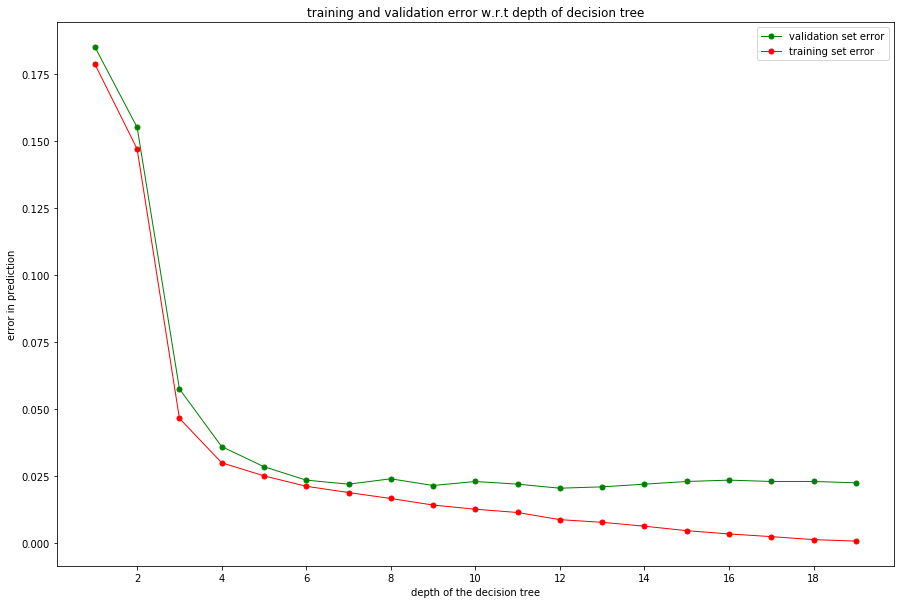

In [199]:
%matplotlib inline
plot = plt.figure(figsize = (15,10))
# plt.plot(d_arr, train_err,  'o' , 'red')
# plt.plot(d_arr, validate_err , '')
ax = plot.gca()#         print(str(thres) + " " + str(ig))

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(depth_arr, validate_err, 'go-', linewidth=1, markersize=5, label = 'validation set error')
plt.plot(depth_arr, train_err, 'ro-', linewidth=1, markersize=5, label = 'training set error')
plt.xlabel("depth of the decision tree")
plt.ylabel("error in prediction")
plt.legend(loc='upper right')
plt.title("training and validation error w.r.t depth of decision tree")
plt.savefig("result.png")

#### Result : when depth exceeds a certain value the validation error starts increasing due to overfitting. 

### nodes vs error plot 

In [232]:
def nodes_vs_error(filename , length = 7):
    train_data , validate_data = import_data(filename)
    node_arr = []
    train_err = []
    validate_err = []
    for depth in range(1, length):
        nodes = int(math.pow(2, depth))-1
        print("=========training on nodes : " + str(nodes)+"=================")
        model  = DecisionTree(train_data,'left', node_count = nodes , method = 'entropy')
        print("=========================== on train error ===============================")
        train_error = 1 - test_predictions(model , train_data) 
        print("=========================== on validate error ===============================")
        validate_error = 1  - test_predictions(model, validate_data)
        node_arr.append(nodes)
        train_err.append(train_error)
        validate_err.append(validate_error)
    return node_arr,train_err,validate_err
        

In [233]:
node_arr,train_err,validate_err = nodes_vs_error('train.csv', 10)

=========training on nodes : 1=================
=========================== on train error ===============================
true positive 1697
true negative 6514
false positive 1107
false negative 682
accuracy is 82.11%
precision is 0.605206825777
recall is 0.713324896455
F1 score 0.654783422927
=========================== on validate error ===============================
true positive 201
true negative 811
false positive 130
false negative 95
accuracy is 81.8108326597%
precision is 0.607250571828
recall is 0.679053824644
F1 score 0.641098280522
=========training on nodes : 3=================
=========================== on train error ===============================
true positive 1023
true negative 7487
false positive 134
false negative 1356
accuracy is 85.1%
precision is 0.884183156078
recall is 0.430012592265
F1 score 0.578575851686
=========================== on validate error ===============================
true positive 126
true negative 925
false positive 16
false negative 170
acc

Text(0.5,1,'training and validation error w.r.t depth of decision tree')

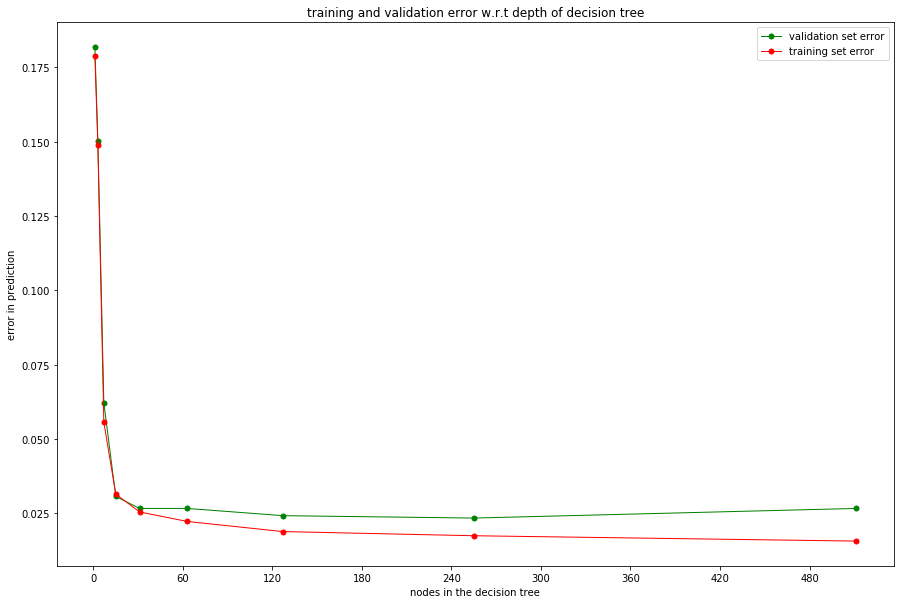

In [238]:
%matplotlib inline
plot = plt.figure(figsize = (15,10))
# plt.plot(d_arr, train_err,  'o' , 'red')
# plt.plot(d_arr, validate_err , '')
ax = plot.gca()#         print(str(thres) + " " + str(ig))

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(node_arr, validate_err, 'go-', linewidth=1, markersize=5, label = 'validation set error')
plt.plot(node_arr, train_err, 'ro-', linewidth=1, markersize=5, label = 'training set error')
plt.xlabel("nodes in the decision tree")
plt.ylabel("error in prediction")
plt.legend(loc='upper right')
plt.title("training and validation error w.r.t depth of decision tree")
# plt.savefig("result.png")

# Part-6  

### Handling missing values in test samples 

Following approaches can be used to distribute missing values instances:
1. Mean Imputation : replace the value by the mean of observed values of the same variable.
2. Hot Deck Imputation : A randomly chosen value from an individual in the sample who has similar values on other variables. In other words, find all the sample subjects who are similar on other variables, then randomly choose one of their values on the missing variable."
3. predict missing value using regression strategy.
4. In case of categorical data associate a branch for missing value and proceed on it.
5. In case of numerical data associate the missing value with the branch that has least error.